In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Package

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## Menampilkan Gambar

In [70]:
image = Image.open("/content/drive/MyDrive/image/lemhanas.jpg")

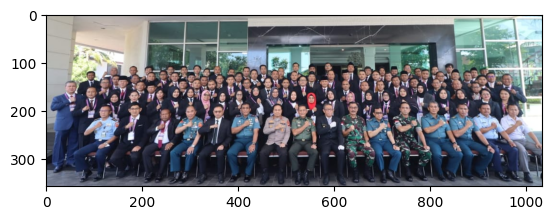

In [71]:
plt.imshow(image)
plt.show()

In [72]:
image = np.array(image)

## Menampilkan Grayscale

In [73]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Metode Haar-cascade

In [74]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2025-03-21 07:29:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.3’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.008s  

2025-03-21 07:29:42 (117 MB/s) - ‘haarcascade_frontalface_default.xml.3’ saved [930127/930127]



In [75]:
haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

## Metode Haar-cascade ke Gambar Grayscale

In [76]:
faces_rect = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=9)

## Tampilkan Deteksi Wajah

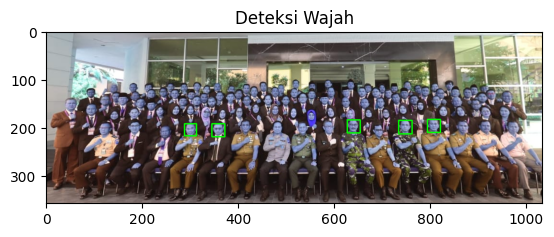

In [77]:
for (x, y, w, h) in faces_rect:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Deteksi Wajah')
plt.show()

## SSD (Single Shot Detector)

In [78]:
prototxt_path = "/content/drive/MyDrive/haar_cascade/deploy.prototxt"
caffemodel_path = "/content/drive/MyDrive/haar_cascade/res10_300x300_ssd_iter_140000.caffemodel"

net = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

In [79]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
net.setInput(blob)
detections = net.forward()

In [80]:
print(detections)

[[[[0.         1.         0.13342598 ... 0.14771345 2.9660954
    0.8748193 ]
   [0.         1.         0.13329408 ... 0.12881106 0.99494934
    0.87567526]
   [0.         1.         0.12859121 ... 0.13177001 4.96996
    0.8802849 ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


In [81]:
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
        (startX, startY, endX, endY) = box.astype("int")

        cv2.rectangle(image, (startX, startY), (endX, endY), (255, 255, 0), 2)

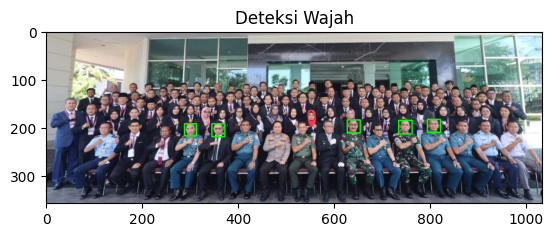

In [82]:
plt.imshow(image)
plt.title('Deteksi Wajah')
plt.show()